<a href="https://colab.research.google.com/github/woofiwaffle/Projects_BD/blob/main/practical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cityofLA/los-angeles-building-and-safety-permits")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/cityofLA/los-angeles-building-and-safety-permits/versions/11


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/cityofLA/los-angeles-building-and-safety-permits/versions/11"

# Вывести список файлов
print(os.listdir(dataset_path))


['building-and-safety-permit-information.csv', 'socrata_metadata_building-and-safety-permit-information.json', 'building-and-safety-temporary-special-event-tse-permits.csv', 'socrata_metadata_building-and-safety-temporary-special-event-tse-permits.json']


In [ ]:
!mkdir -p /content/dataset
!cp -r /root/.cache/kagglehub/datasets/cityofLA/los-angeles-building-and-safety-permits/versions/11/* /content/dataset/

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
# 1. Загрузка данных
dataset_path = "/content/dataset/building-and-safety-permit-information.csv"
df = pd.read_csv(dataset_path)

<ipython-input-37-999ca188957c>:3: DtypeWarning: Columns (1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


In [38]:
# 2. Описание датасета
print("Размерность датасета:", df.shape)
print("Типы данных:")
print(df.dtypes)
print("Пропущенные значения:")
print(df.isnull().sum())

Размерность датасета: (1082006, 65)
Типы данных:
Assessor Book                        float64
Assessor Page                         object
Assessor Parcel                       object
Tract                                 object
Block                                 object
                                      ...   
Census Tracts                        float64
Precinct Boundaries                  float64
LA Specific Plans                    float64
Council Districts                    float64
Neighborhood Councils (Certified)    float64
Length: 65, dtype: object
Пропущенные значения:
Assessor Book                          1210
Assessor Page                          1210
Assessor Parcel                        1210
Tract                                  4529
Block                                871465
                                      ...  
Census Tracts                         60620
Precinct Boundaries                   60625
LA Specific Plans                    724633
Council Dist

In [39]:
# 3. Выбор задачи: Классификация типов разрешений (Permit Type)
print("Уникальные классы в Permit Type:", df['Permit Type'].unique())

df = df[['Permit Type', 'Permit Category', 'Status', 'Valuation', 'Census Tract']].dropna()
label_encoders = {}
for col in ['Permit Category', 'Status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Permit Type'] = LabelEncoder().fit_transform(df['Permit Type'])

Уникальные классы в Permit Type: ['HVAC' 'Bldg-Alter/Repair' 'Plumbing' 'Bldg-New' 'Electrical'
 'Nonbldg-New' 'Bldg-Addition' 'Elevator' 'Bldg-Demolition'
 'Fire Sprinkler' 'Pressure Vessel' 'Nonbldg-Alter/Repair' 'Grading'
 'Swimming-Pool/Spa' 'Sign' 'Nonbldg-Addition' 'Nonbldg-Demolition'
 'Bldg-Relocation']


In [40]:
# 4. Разделение данных на train/test
X = df.drop(columns=['Permit Type'])
y = df['Permit Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 5. Выбор модели (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [43]:
# 6. Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)
print("Отчет по классификации:")
print(classification_report(y_test, y_pred))

Точность модели: 0.7834411983375382
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      7680
           1       0.85      0.91      0.88     49955
           2       0.53      0.49      0.51      2891
           3       0.77      0.73      0.75      5360
           4       0.00      0.00      0.00         3
           5       0.27      0.15      0.19        20
           6       0.51      0.28      0.36        65
           7       0.60      0.47      0.53       807
           8       0.94      0.89      0.92      4389
           9       0.35      0.25      0.29       151
          10       0.21      0.14      0.16        44
          11       0.36      0.20      0.26      1087
          12       0.33      0.12      0.18         8
          13       0.45      0.36      0.40      3737
          14       0.39      0.28      0.33       236
          15       0.58      0.49      0.53      2775
          16       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


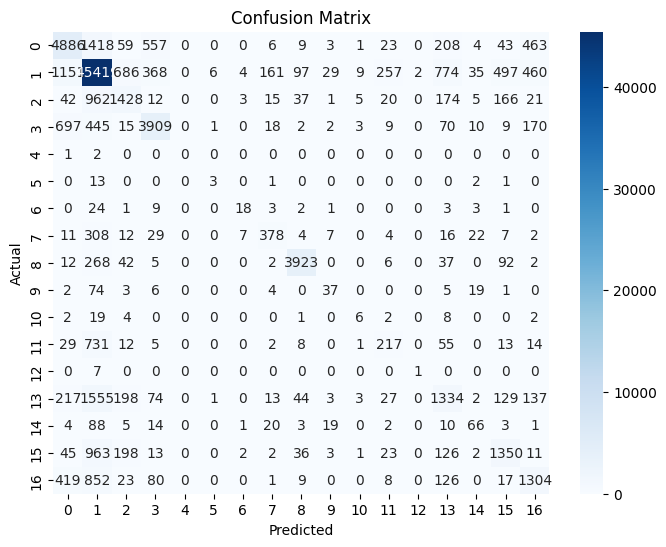

In [44]:
# 7. Визуализация матрицы ошибок
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()